In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
def parse_file(filename):
    with open(filename, "r", encoding="utf-8") as f:
        lines = f.read().strip().split("\n")

    data = []
    i = 0
    while i < len(lines):
        if lines[i].startswith("T_max"):
            T = int(re.findall(r"\d+", lines[i])[0])
            # пропускаем заголовок
            i += 2
            q75 = list(map(float, lines[i].split()[1:]))
            mid = list(map(float, lines[i+1].split()[1:]))
            q25 = list(map(float, lines[i+2].split()[1:]))
            data.append({
                "T_max": T,
                "q75_cont": q75[0], "mid_cont": mid[0], "q25_cont": q25[0],
                "q75_lim": q75[1], "mid_lim": mid[1], "q25_lim": q25[1],
            })
            i += 3
        else:
            i += 1

    return pd.DataFrame(data).sort_values("T_max")

In [3]:
def plot_volatility(df):
    plt.figure(figsize=(8,5))

    # Средние
    plt.plot(df["T_max"], df["mid_cont"], color="blue", label="Cont (среднее)")
    plt.plot(df["T_max"], df["mid_lim"], color="red", label="Lim (среднее)")

    # Диапазоны квантилей
    plt.fill_between(df["T_max"], df["q25_cont"], df["q75_cont"], color="blue", alpha=0.2, label="Cont q25-q75")
    plt.fill_between(df["T_max"], df["q25_lim"], df["q75_lim"], color="red", alpha=0.2, label="Lim q25-q75")

    plt.xlabel("T_max")
    plt.ylabel("Волатильность")
    plt.title("Сравнение волатильности")
    plt.legend()
    plt.grid(True)
    plt.show()

    T_max  q75_cont  mid_cont  q25_cont  q75_lim  mid_lim  q25_lim
2       5    5.2600      4.16      2.37   8.5300     6.79   4.9000
1      10    7.2300      5.93      3.57  12.0600     9.62   7.8600
5      20    1.9625      1.68      0.92   8.8650     6.52   4.3550
0      30    2.9600      2.26      1.33  10.6200     7.27   3.7200
6      40    1.5800      1.33      0.68   5.8400     4.96   3.9100
3      50    1.4400      1.15      0.72   6.8450     5.28   3.0700
9      60    1.0300      0.82      0.54   3.2550     3.22   2.4800
10     70    1.0900      0.89      0.61   4.3000     3.91   3.1200
7      80    0.7800      0.66      0.40   5.4125     4.24   3.0975
4     100    0.5400      0.44      0.31   3.4000     2.99   2.4425
8     150    0.3900      0.30      0.19   3.6000     3.27   2.8100


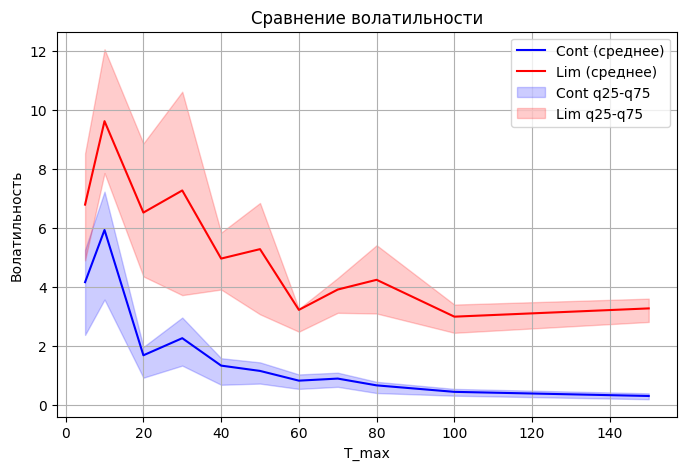

In [4]:
df = parse_file("volatility_sum.txt")  # укажи имя своего файла
print(df)
plot_volatility(df)

(array([ 82.,   1.,   4.,   4.,   3.,   1.,   1.,   1.,   3., 267.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

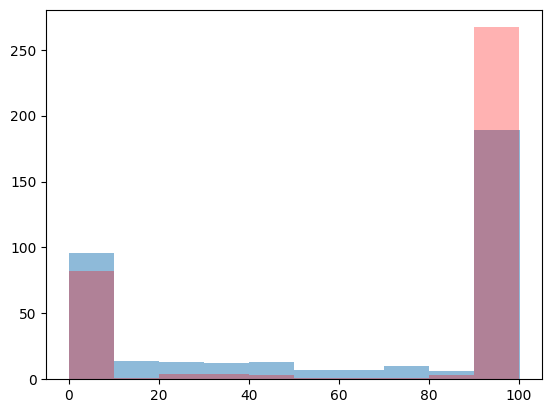

In [ ]:
data_cont = pd.read_csv("part_compl_cont.txt",sep=" ")
data_lim = pd.read_csv("part_compl_lim.txt",sep=" ")

plt.hist(data_cont["part"],alpha=0.5)
plt.hist(data_lim["part"], alpha=0.3, color="red")
#t_max = 30

1003.4680554177997
1191.3335783678006


(array([104.,   5.,   5.,   3.,   4.,   1.,   5.,   3.,   5., 230.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

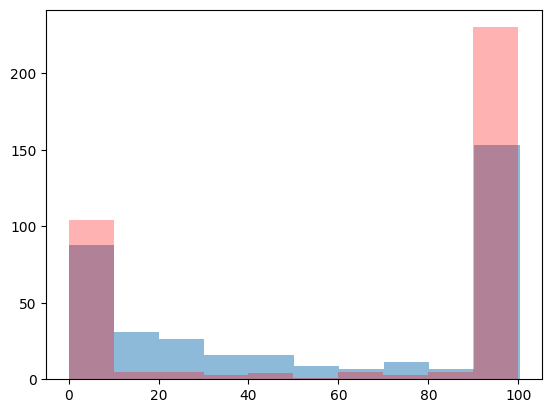

In [41]:
data_cont = pd.read_csv("part_compl_cont.txt",sep=" ")
data_lim = pd.read_csv("part_compl_lim.txt",sep="\s+")
#print(data_lim)
s_lim = 0
s_cont = 0
for i in range(len(data_cont)):
    s_cont += data_cont["part"][i] * data_cont["q_max"][i] / 100
print(s_cont / 2)

for i in range(len(data_lim)):
    s_lim += data_lim["part"][i] * data_lim["q_max"][i] / 100
print(s_lim / 2)


plt.hist(data_cont["part"],alpha=0.5)
plt.hist(data_lim["part"], alpha=0.3, color="red")
#t_max = 20


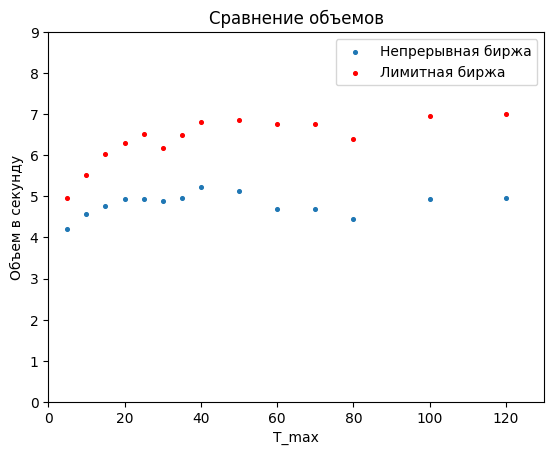

In [71]:
value_lim = [6.037658595835571,6.2977882065622826,5.515383434747998,6.508718453048858,6.497662119072003,6.184211351585288,6.854696622041994,4.967461328460141,6.759630101085144,
             6.759630101085144,6.820283158864001,6.390537123405143,6.946452238248709,
             6.9946833465698575]
value_cont = [4.774417867868425,4.932650464264855,4.561989569755,4.939579315079138,4.949899189191007,4.8898030046492895,5.1242937751184305,4.214800475244571,4.694763327246144,
              4.694763327246144,5.2202890597988585,4.4443741026924295,4.926141362472284,
              4.960991895633139]
t_maxs = [15,20,10,25,35,30,50,5,60,70,40,80,100,120]
plt.scatter(t_maxs, value_cont, s=7, label="Непрерывная биржа")
plt.scatter(t_maxs, value_lim, s=7,c="red",label="Лимитная биржа")
plt.xlim(0,130)
plt.ylim(0,9)
plt.xlabel("T_max")
plt.ylabel("Объем в секунду")
plt.title("Сравнение объемов")
plt.legend()